# Affichage des résultats

Résultats de l'expérience exp_eyelink_pylink.py en fichier .EDF convertie au préalable en .asc avec edf2asc

installer pygazeanalyser

In [1]:
import numpy as np
from matplotlib import pyplot as plt
#from pygazeanalyser.edfreader import read_edf
from ANEMO import read_edf
import pickle
import os

In [2]:
session='a'
liste_binomiale = np.load(os.path.join('parametre_exp', session + '.npy'))

resultats = os.path.join('data', 'bm170711.asc')
data = read_edf(resultats, 'TRIALID')

Largeur_ecran = 1280

In [3]:
print(len(data))

15


In [4]:
cible = []
for essai in range(len(data)):
    TargetOn = data[essai]['events']['msg'][15][0]
    TargetOff = data[essai]['events']['msg'][16][0]
    trackertime = data[essai]['trackertime']
    
    signe_direction = liste_binomiale[essai]*2 - 1

    # définition du tps (en secondes) que la cible met à arriver à son point final (0.9*demi ecran)
    tps_mvt = TargetOff-TargetOn
    
    cible_essaie = []
    x = Largeur_ecran/2
    
    for t in range(len(trackertime)):
        if t < (TargetOn-trackertime[0])  :
            x = Largeur_ecran/2
        elif (t >= (TargetOn-trackertime[0]) and t <= (TargetOff-trackertime[0])) :
            x = x + signe_direction*((0.9*(Largeur_ecran/2))/tps_mvt)
        else :
            x = x
        cible_essaie.append(x)
    cible.append(cible_essaie)

In [5]:
def plot_resultat(data, cible) :
    fig_width = 20

    fig, axs = plt.subplots(len(data), 1, figsize=(fig_width, (fig_width*5)/(1.6180)))
    plt.subplots_adjust(wspace = 0, hspace = 0 )
    for essai in range(len(data)) :
        data_x = data[essai]['x']
        data_y = data[essai]['y']
        trackertime = data[essai]['trackertime']

        TRIALID = data[essai]['events']['msg'][0][0]
        StimulusOn = data[essai]['events']['msg'][10][0]
        StimulusOf = data[essai]['events']['msg'][14][0]
        TargetOn = data[essai]['events']['msg'][15][0]
        TargetOff = data[essai]['events']['msg'][16][0]
        fixations = data[essai]['events']['Efix']
        saccades = data[essai]['events']['Esac']

        start = TargetOn

        TRIALID = TRIALID - start
        StimulusOn = StimulusOn - start
        StimulusOf = StimulusOf - start
        TargetOn = TargetOn - start
        TargetOff = TargetOff - start
        trackertime = trackertime - start

        axs[essai].axis([StimulusOf-10, TargetOff+10, 0, 1280])
        axs[essai].plot(trackertime, data_x, color='r', linewidth=1.5)
        #axs[essai].plot(trackertime, data_y, color='m', linewidth=1.5)
        axs[essai].plot(trackertime, cible[essai], color='k', linewidth=1.5)

        #axs[essai].bar(TRIALID, 1280, color='g', width=5, linewidth=0)
        #axs[essai].bar(StimulusOn, 1280, color='r', width=5, linewidth=0)
        axs[essai].bar(StimulusOf, 1280, color='r', width=5, linewidth=0)
        axs[essai].bar(TargetOn, 1280, color='k', width=5, linewidth=0)
        axs[essai].bar(TargetOff, 1280, color='k', width=5, linewidth=0)

        axs[essai].set_xlabel('Temps en msec', fontsize=14)
        axs[essai].xaxis.set_ticks(range(StimulusOf+1, TargetOff, 100))
        axs[essai].set_ylabel(essai, fontsize=14)
        axs[essai].yaxis.set_ticks(range(0, 1280, 300))

        for f in range(len(fixations)) :
            axs[essai]. axvspan(fixations[f][0]-start, fixations[f][1]-start, color='r', alpha=0.1)
        for s in range(len(saccades)) :
            axs[essai]. axvspan(saccades[s][0]-start, saccades[s][1]-start, color='k', alpha=0.2)

    plt.show()

In [6]:
def plot_essai(data, cible, essai) :
    fig_width = 20

    fig, axs = plt.subplots(1, 1, figsize=(fig_width, fig_width/(1.6180)))

    data_x = data[essai]['x']
    data_y = data[essai]['y']
    trackertime = data[essai]['trackertime']

    TRIALID = data[essai]['events']['msg'][0][0]
    StimulusOn = data[essai]['events']['msg'][10][0]
    StimulusOf = data[essai]['events']['msg'][14][0]
    TargetOn = data[essai]['events']['msg'][15][0]
    TargetOff = data[essai]['events']['msg'][16][0]
    saccades = data[essai]['events']['Esac']

    start = TargetOn

    TRIALID = TRIALID - start
    StimulusOn = StimulusOn - start
    StimulusOf = StimulusOf - start
    TargetOn = TargetOn - start
    TargetOff = TargetOff - start
    trackertime = trackertime - start

    axs.axis([StimulusOf-10, TargetOff+10, 0, 1280])
    axs.plot(trackertime, data_x, color='r', linewidth=1.5)
    axs.bar(StimulusOf, 1280, color='r', width=5, linewidth=0)
    axs.bar(TargetOn, 1280, color='k', width=5, linewidth=0)
    axs.bar(TargetOff, 1280, color='k', width=5, linewidth=0)
    axs.plot(trackertime, cible[essai], color='k', linewidth=1.5)
    axs.set_ylabel(essai, fontsize=14)
    axs.xaxis.set_ticks(range(StimulusOf+1, TargetOff, 100))
    for s in range(len(saccades)) :
        axs.axvspan(saccades[s][0]-start, saccades[s][1]-start, color='k', alpha=0.2)

    plt.show()

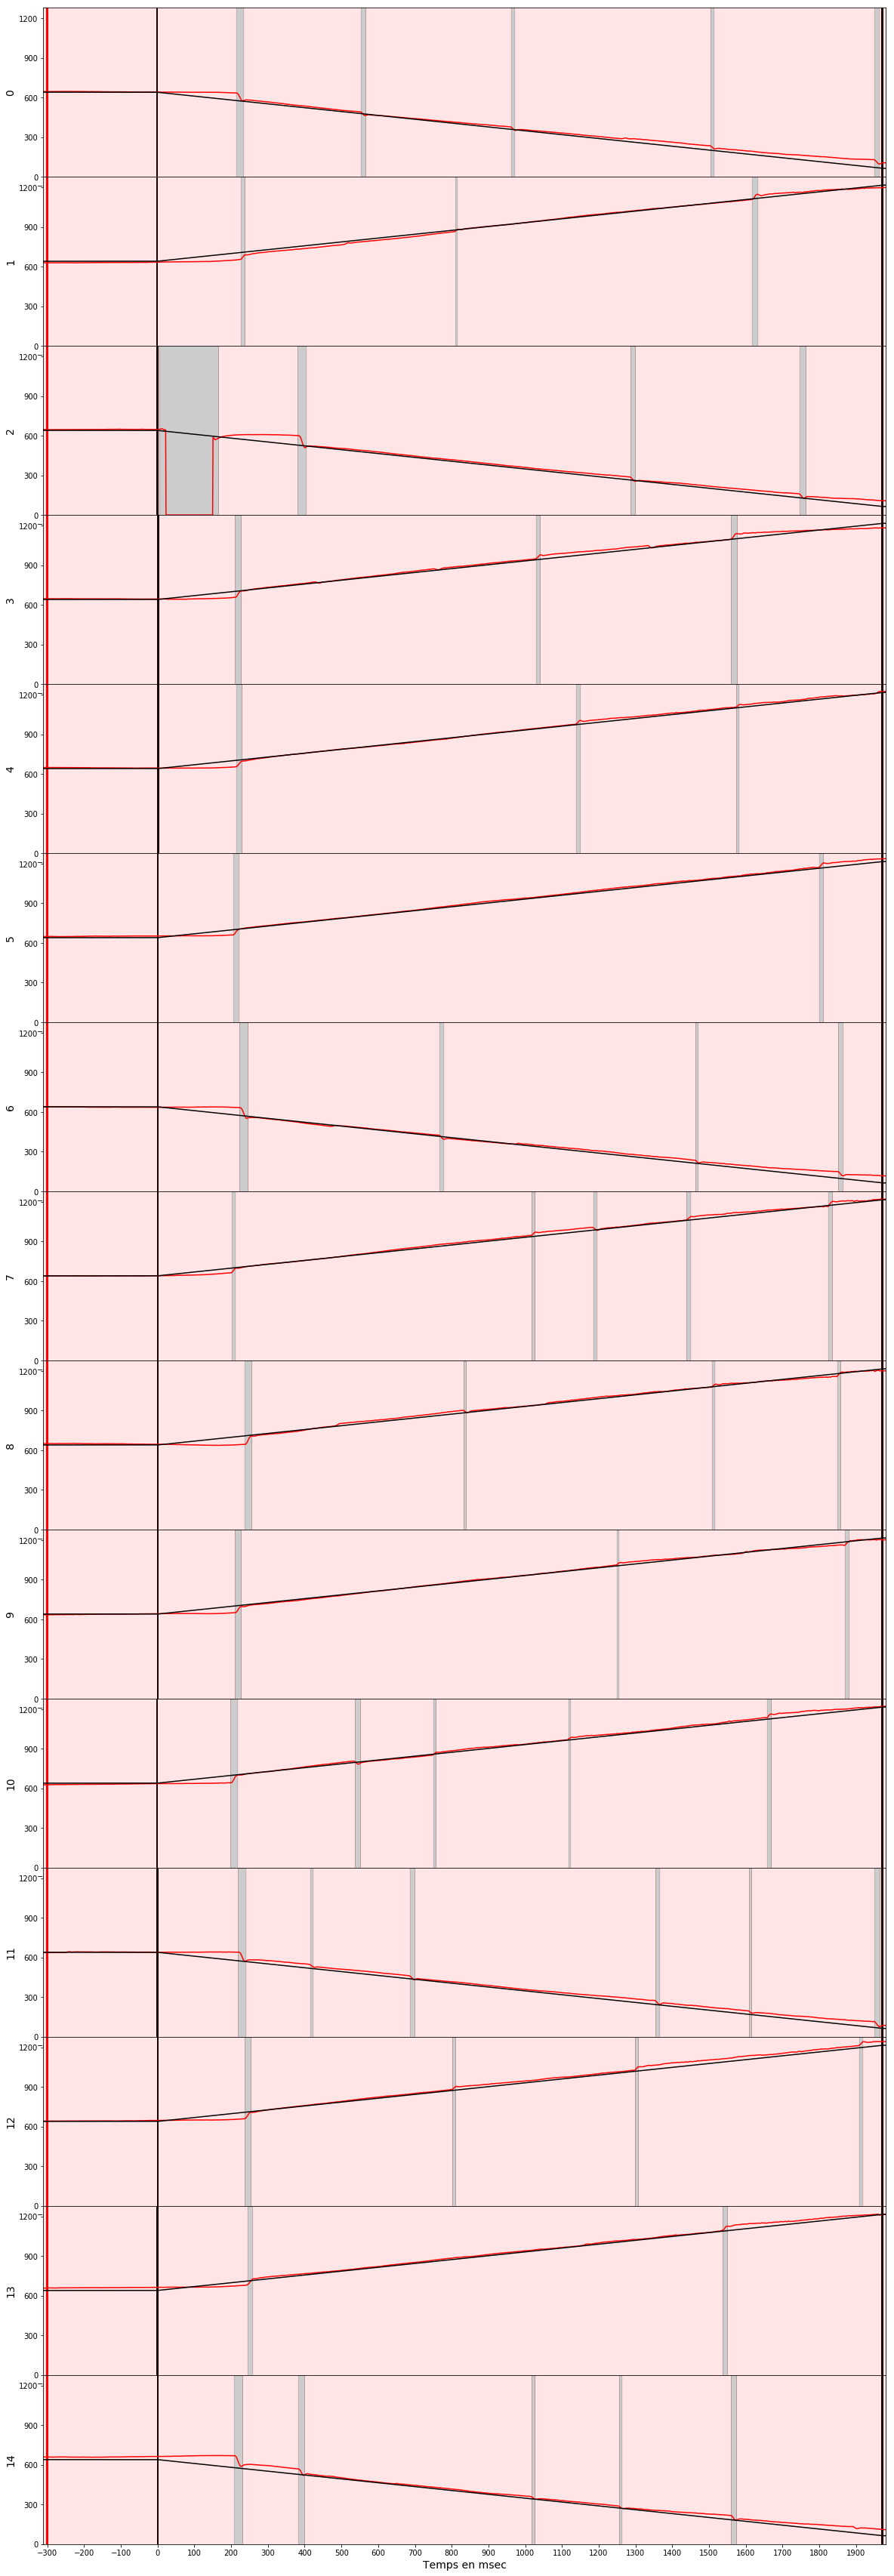

In [7]:
plot_resultat(data, cible)

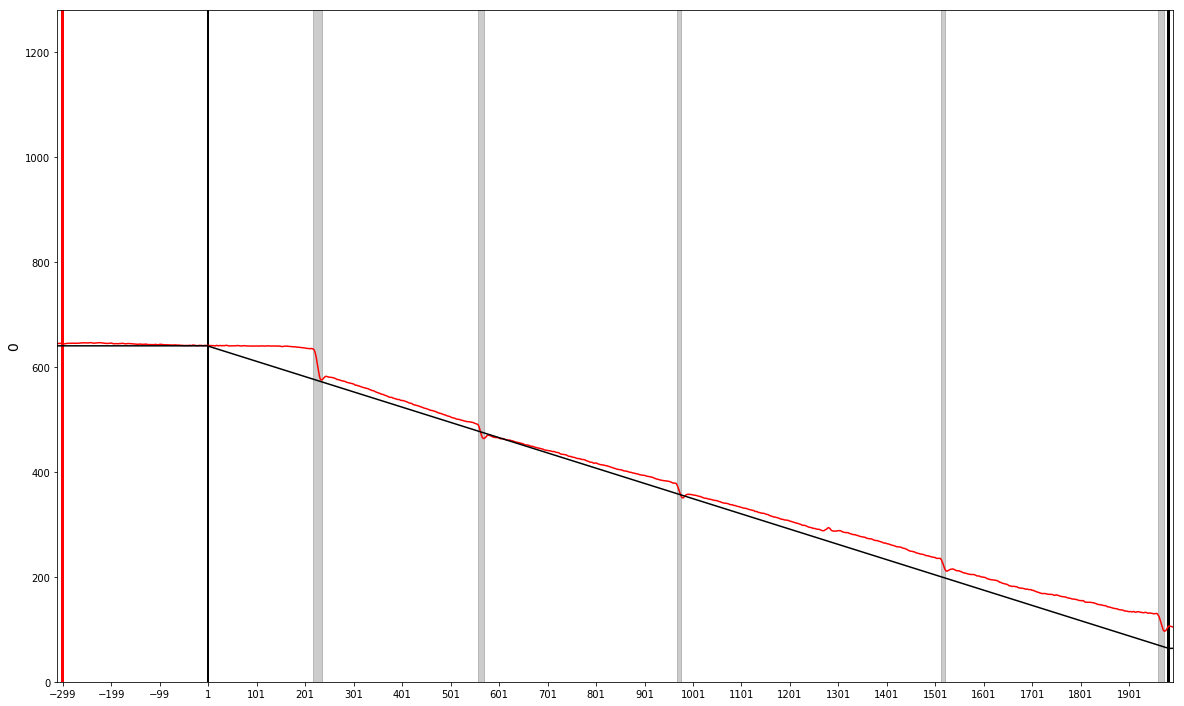

In [8]:
plot_essai(data, cible, 0)

## Avec le RashBass

In [9]:
resultats = os.path.join('../data', 'eyeMvt_s02_2017-09-26_095637.asc')
data = read_edf(resultats, 'TRIALID')

file = 'eyeMvt_s02_2017-09-26_095637.pkl'
with open(os.path.join('../data', file), 'rb') as fichier :
    exp = pickle.load(fichier, encoding='latin1')

N_trials = exp['N_trials']
N_blocks = exp['N_blocks']
screen_width_px = exp['screen_width_px']
screen_height_px = exp['screen_height_px']
V_X = exp['V_X']
##################################
RashBass = exp['RashBass']
##################################
stim_tau = exp['stim_tau']
p = exp['p']

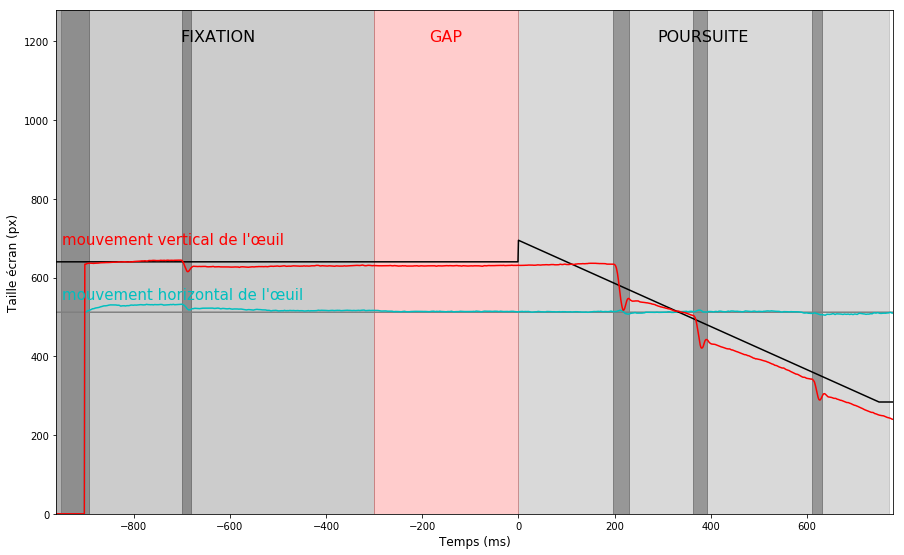

In [10]:
fig_width= 15
fig, axs = plt.subplots(1, 1, figsize=(fig_width, (fig_width/1.6180)))

trial = 0
block = 0
trial_data = trial + N_trials*block

data_x = data[trial_data]['x']
data_y = data[trial_data]['y']
trackertime = data[trial_data]['trackertime']

TRIALID = data[trial_data]['events']['msg'][0][0]
StimulusOn = data[trial_data]['events']['msg'][10][0]
StimulusOf = data[trial_data]['events']['msg'][14][0]
TargetOn = data[trial_data]['events']['msg'][15][0]
TargetOff = data[trial_data]['events']['msg'][16][0]
fixations = data[trial_data]['events']['Efix']
saccades = data[trial_data]['events']['Esac']

start = TargetOn

TRIALID = TRIALID - start
StimulusOn = StimulusOn - start
StimulusOf = StimulusOf - start
TargetOn = TargetOn - start
TargetOff = TargetOff - start
trackertime = trackertime - start

##################################################
# TARGET
##################################################
dir_bool = p[trial, block, 0]*2 - 1
tps_mvt = TargetOff-TargetOn
Target_trial = []
x = screen_width_px/2

d = 100
for t in range(len(trackertime)):
    if t < (TargetOn-trackertime[0]) :
        x = screen_width_px/2
    elif t == (TargetOn-trackertime[0]) :
        # la cible à t=0 recule de sa vitesse * latency=RashBass (ici mis en ms)
        x = x -(dir_bool * ((V_X/1000)*RashBass))
    elif (t > (TargetOn-trackertime[0]) and t <= ((TargetOn-trackertime[0])+stim_tau*1000)) :
        x = x + (dir_bool*(V_X/1000))
    else :
        x = x
    Target_trial.append(x)
##################################################
axs.axis([StimulusOf-10, TargetOff+10, 0, 1280])

axs.plot(trackertime, np.ones(len(trackertime))*(screen_height_px/2), color='grey', linewidth=1.5)
axs.plot(trackertime, data_y, color='c', linewidth=1.5)

axs.plot(trackertime, Target_trial, color='k', linewidth=1.5)
axs.plot(trackertime, data_x, color='r', linewidth=1.5)

#axs.bar(TRIALID, 1280, color='g', width=5, linewidth=0)
#axs.bar(StimulusOn, 1280, color='r', width=5, linewidth=0)
#axs.bar(StimulusOf, 1280, color='r', width=5, linewidth=0)
#axs.bar(TargetOn, 1280, color='k', width=5, linewidth=0)
#axs.bar(TargetOff, 1280, color='k', width=5, linewidth=0)

axs.axvspan(StimulusOn, StimulusOf, color='k', alpha=0.2)
axs.axvspan(StimulusOf, TargetOn, color='r', alpha=0.2)
axs.axvspan(TargetOn, TargetOff, color='k', alpha=0.15)



axs.set_xlabel('Temps (ms)', fontsize=12)
axs.set_ylabel('Taille écran (px)', fontsize=12)
axs.axis([StimulusOn-10, TargetOff+10, 0, 1280])

axs.text(StimulusOn+(StimulusOf-StimulusOn)/2, 1200, "FIXATION", color='k', fontsize=16, horizontalalignment='center')
axs.text(StimulusOf+(TargetOn-StimulusOf)/2, 1200, "GAP", color='r', fontsize=16, horizontalalignment='center')
axs.text(TargetOn+(TargetOff-TargetOn)/2, 1200, "POURSUITE", color='k', fontsize=16, horizontalalignment='center')

axs.text(-950, 685, "mouvement vertical de l'œuil", color='r', fontsize=15)
axs.text(-950, 545, "mouvement horizontal de l'œuil", color='c', fontsize=15)


#for f in range(len(fixations)) :
#    axs.axvspan(fixations[f][0]-start, fixations[f][1]-start, color='r', alpha=0.1)
for s in range(len(saccades)) :
    axs.axvspan(saccades[s][0]-start, saccades[s][1]-start, color='k', alpha=0.3)

plt.show()